In [1]:
import math
import networkx as nx
import pandas as pd
import numpy as np
from sympy import LambertW


## Random graph model
@np.vectorize
def giant_component_fraction(mean_degree):
	return 1 + LambertW(-mean_degree * np.exp(-mean_degree))\
           / mean_degree if mean_degree >= 1. else 0.

fct = np.vectorize(math.factorial)

def dist_node_component(s, c):
	return np.exp( - s * c) * c * (s * c) ** (s-2) / fct(s-1)

def dist_comp_sizes(s, c):
	return 1 / s * dist_node_component(s, c)

def avg_comp_size(c):
	S = giant_component_fraction(c)
	return 1 / (1 - c + c * S)

def largest_comp_fraction(c=0.4, n=100):
    s = np.linspace(1,20,20)
    
    S = np.asscalar(giant_component_fraction(c))
    dist_component_sizes = pd.Series(dist_comp_sizes(s, c), index=s)
    k = int(np.ceil( dist_component_sizes.sum() * n))
    x_s = (dist_component_sizes * n / k)
    cdf_s = x_s.cumsum()
    y = (cdf_s ** k)
    yy = y.diff()
    yy[1] = y[1]
    exp_yy = np.sum(yy.index.values * yy) / n
    return max(exp_yy, S)#, yy, k, dist_component_sizes, S

In [2]:
from bokeh.palettes import inferno
from matplotlib import pyplot as plt

In [3]:
from scipy.stats import expon

In [4]:
g = lambda x, α: expon.pdf(x, scale=1/α) / (1-np.exp(-α))
G = lambda x, α: expon.cdf(x, scale=1/α) / (1-np.exp(-α))

In [5]:
ρ = np.linspace(0, 1., 100)
n = 100

In [6]:
α = 5
n = 100
c = (1-G(ρ, α)) * (n-1)

f_largest = np.vectorize( lambda c: largest_comp_fraction(c=c, n=n))
l = f_largest(c)

/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply


/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in power
/usr/local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in multiply


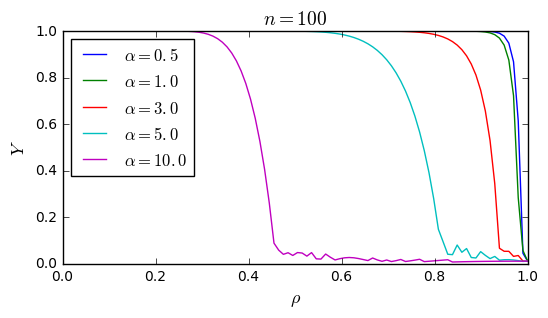

In [7]:
%matplotlib inline
plt.figure(figsize=(6,3))
plt.title("$n = %d$" % n, fontsize=14)
plt.hold(True)
plt.xlabel("$\\rho$", fontsize=13)
plt.ylabel("$Y$", fontsize=13)

alphas = [0.5, 1.0, 3., 5., 10.]
colors = inferno(len(alphas))
lines = []
vals = {}
for i, α in enumerate(alphas):
    c = (1-G(ρ, α)) * (n-1)
    l = f_largest(c)
    vals["%f" % α] = l    
    ll, = plt.plot(ρ, l, label="$\\alpha = %.1f$" % α)
    lines.append(ll)

lgd = plt.legend(handles = lines, loc='best')
# plt.savefig("../figures/3_largest_component.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)